# Simple Neural Network (Without a Bias)
We will be creating a simple Neural Network based on Tensor Flow

In [1]:
# Import Necessary Modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Set up the random seed
rnd=tf.set_random_seed(111)
# Display plots inline
%matplotlib inline
# Plots Figure Size
matplotlib.rcParams['figure.figsize']=(10.0,10.0)

In [3]:
# read the datasets
Data = pd.read_csv("intro_to_ann.csv")
# Divide the Data into Train-Test
print (Data.head())
Xtrain, ytrain,Xtest,ytest = np.array(Data.ix[0:349,0:2]), np.array(Data.ix[0:349,2:3]),np.array(Data.ix[350:,0:2]), np.array(Data.ix[350:,2:3])
print('Training Set:',Xtrain.shape, ytrain.shape,'\nTesting Set: ',Xtest.shape, ytest.shape)
print('Total Data Size:',Data.shape)

   Feature1  Feature2  Target
0  2.067788  0.258133       1
1  0.993994 -0.609145       1
2 -0.690315  0.749921       0
3  1.023582  0.529003       0
4  0.700747 -0.496724       1

[5 rows x 3 columns]
Training Set: (350, 2) (350, 1) 
Testing Set:  (150, 2) (150, 1)
Total Data Size: (500, 3)


In [4]:
# Function Modules
# Initial Weights (Random Number)
def weights(size):
    wt=tf.random_normal(size,stddev=0.1)
    var= tf.Variable(wt)
    return var

# Foraward Propagation
def ForwardPropagation(X,wih,who):
    h=tf.nn.softmax(tf.matmul(X,wih))
    yhat=tf.nn.sigmoid(tf.matmul(h,who))
    return yhat

# Neural Network (without Bias)

In [5]:
# Network Parameters
ni=Xtrain.shape[1]     # Nodes in Input Layer
nh=4                   # Nodes in Hidden Layer
no=1                   # Nodes in output layer
print('Input Nodes:',ni,'\nHidden Nodes:',nh,'\nOutput Nodes:',no)

Input Nodes: 2 
Hidden Nodes: 4 
Output Nodes: 1


In [6]:
# Variable for loading Data
X=tf.placeholder("float",[None,ni])
y=tf.placeholder("float",[None,no])

In [7]:
# Weight Initialization
wih = weights((ni,nh))
who = weights((nh,no))

In [8]:
# Forward Propagation using tensor flow
yhat = ForwardPropagation(X,wih,who)
predict = tf.argmax(yhat, dimension=1)

In [9]:
# Backward propagation using tensor flow
cost=tf.reduce_mean(-tf.reduce_sum(y * tf.log(yhat), reduction_indices=[1]))
updates = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

0.184212
0.110845
0.0746835
0.0539925
0.0412888
0.0330625
0.0274502
0.0234343
0.0204414
0.0181341
0.016305
0.0148212
0.0135938
0.0125618
0.0116821
0.010923
0.0102613
0.00967906
0.00916277
0.00870166
0.00828721
0.00791257
0.0075722
0.00726153
0.00697675
0.00671471
0.00647273
0.00624855
0.00604025
0.00584616
0.00566484
0.00549504
0.00533569
0.00518581
0.00504458
0.00491125
0.00478516
0.00466572
0.00455242
0.00444477
0.00434236
0.0042448
0.00415176
0.0040629
0.00397795
0.00389666
0.0038188
0.00374413
0.00367246
0.00360362
0.00353744
0.00347376
0.00341243
0.00335332
0.00329633
0.00324133
0.0031882
0.00313689
0.00308726
0.00303924
0.00299276
0.00294775
0.00290411
0.00286181
0.00282077
0.00278094
0.00274227
0.0027047
0.0026682
0.00263268
0.00259816
0.00256455
0.00253185
0.00249999
0.00246896
0.00243871
0.00240923
0.00238048
0.00235243
0.00232505
0.00229834
0.00227225
0.00224676
0.00222187
0.00219753
0.00217373
0.00215047
0.00212772
0.00210546
0.00208368
0.00206237
0.00204149
0.00202105
0.002

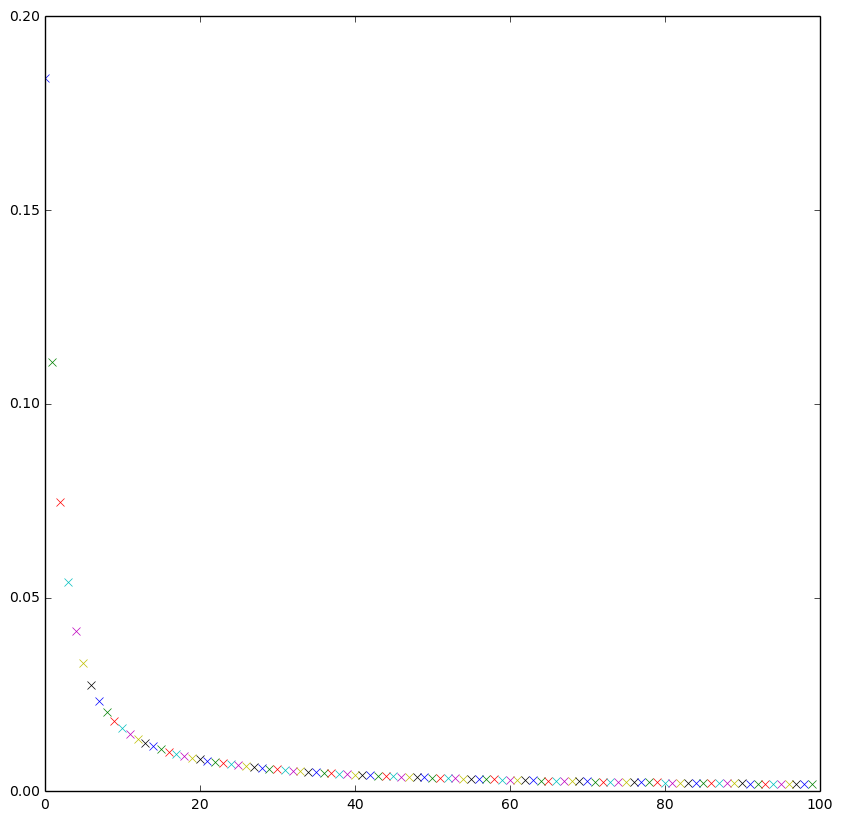

In [10]:
# Run the code
S = tf.Session()
init = tf.initialize_all_variables()
S.run(init)

for iteration in range(100):
    # Train the model
    for i in range(len(Xtrain)):
        costfunction=S.run(cost, feed_dict ={X: Xtrain, y: ytrain})
        Optimized=S.run(updates, feed_dict ={X: Xtrain, y: ytrain})
    print(costfunction)
    plt.plot(iteration,costfunction,'x')